# Task 3

# Imports

In [1]:
import numpy as np
import pandas as pd
from joblib import dump, load
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16, 'axes.labelweight': 'bold', 'figure.figsize': (8,6)})

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ds1gv_5i because the default path (/home/jupyter-student55/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Part 1:

Recall as a final goal of this project. We want to build and deploy ensemble machine learning models in the cloud, where features are outputs of different climate models and the target is the actual rainfall observation. In this milestone, you'll actually build these ensemble machine learning models in the cloud.  

**Your tasks:**

1. Read the data CSV from your s3 bucket. 
2. Drop rows with nans. 
3. Split the data into train (80%) and test (20%) portions with `random_state=123`. 
4. Carry out EDA of your choice on the train split. 
5. Train ensemble machine learning model using `RandomForestRegressor` and evaluate with metric of your choice (e.g., `RMSE`) by considering `Observed` as the target column. 
6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models? 

> Recall that individual columns in the data are predictions of different climate models. 

In [2]:
df = pd.read_csv("s3://mds-s3-student96/ml_data_SYD.csv", index_col=0, parse_dates=True, storage_options=aws_credentials)

### 1. Read the data CSV from S3 bucket

In [3]:
df.head()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
time,,,,,,,,,,,,,,,,,,,,,
1889-01-01,0.040427,1.814552,35.579336,4.268112e+00,1.107466e-03,11.410537,3.322009e-08,2.668800,1.321215,1.515293,...,4.244226e-13,1.390174e-13,6.537884e-05,3.445495e-06,1.576096e+01,4.759651e-05,2.451075,0.221324,2.257933,0.006612
1889-01-02,0.073777,0.303965,4.596520,1.190141e+00,1.015323e-04,4.014984,1.312700e+00,0.946211,2.788724,4.771375,...,4.409552e+00,1.222283e-01,1.049131e-13,4.791993e-09,3.675510e-01,4.350863e-01,0.477231,3.757179,2.287381,0.090422
1889-01-03,0.232656,0.019976,5.927467,1.003845e-09,1.760345e-05,9.660565,9.103720e+00,0.431999,0.003672,4.233980,...,2.269300e-01,3.762301e-01,9.758706e-14,6.912302e-01,1.562869e-01,9.561101e+00,0.023083,0.253357,1.199909,1.401452
1889-01-04,0.911319,13.623777,8.029624,8.225225e-02,1.808932e-01,3.951528,1.317160e+01,0.368693,0.013578,15.252495,...,2.344586e-02,4.214019e-01,7.060915e-03,3.835721e-02,2.472226e-07,5.301038e-01,0.002699,2.185454,2.106737,14.869798
1889-01-05,0.698013,0.021048,2.132686,2.496841e+00,4.708019e-09,2.766362,1.822940e+01,0.339267,0.002468,11.920356,...,4.270161e-13,1.879692e-01,4.504985e+00,3.506923e-07,1.949792e-13,1.460928e-10,0.001026,2.766507,1.763335,0.467628


In [4]:
df.shape

(46020, 26)

### 2. Drop rows with nans

In [5]:
df_model = df.dropna()

In [6]:
df_model.shape

(45989, 26)

### 3. Split the data into train (80%) and test (20%) portions with random_state=123.

In [7]:
df_train, df_test = train_test_split(df_model, test_size=0.2, random_state=123)

### 4. Carry out EDA of your choice on the train split

In [8]:
df.describe()

,ACCESS-CM2,ACCESS-ESM1-5,AWI-ESM-1-1-LR,BCC-CSM2-MR,BCC-ESM1,CMCC-CM2-HR4,CMCC-CM2-SR5,CMCC-ESM2,CanESM5,EC-Earth3-Veg-LR,...,MPI-ESM-1-2-HAM,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,NorESM2-LM,NorESM2-MM,SAM0-UNICON,TaiESM1,Observed
count,46020.000000,46020.000000,4.602000e+04,4.599000e+04,4.599000e+04,45990.000000,4.599000e+04,4.599000e+04,45990.000000,4.602000e+04,...,4.602000e+04,4.602000e+04,4.602000e+04,4.602000e+04,4.602000e+04,45990.000000,45990.000000,4.598900e+04,4.599000e+04,46020.000000
mean,2.430848,2.912583,3.683434e+00,2.214538e+00,2.766201e+00,3.094078,3.592109e+00,3.498336e+00,2.906267,2.561700e+00,...,3.199937e+00,1.307366e+00,2.053704e+00,1.522702e+00,1.740428e+00,2.466873,2.874875,3.377089e+00,3.439337e+00,2.747656
std,6.803409,6.949986,7.213876e+00,6.519289e+00,6.046297e+00,6.428127,7.380154e+00,7.081685e+00,6.952597,5.754092e+00,...,6.924067e+00,4.885537e+00,5.373245e+00,4.949345e+00,4.872257e+00,5.840286,7.042023,7.917762e+00,7.577999e+00,8.188408
min,0.000000,0.000000,9.161142e-14,4.211430e-24,1.091904e-24,0.000000,-4.503054e-17,-3.186177e-19,0.000000,-9.934637e-19,...,3.315622e-13,1.088608e-13,9.155419e-14,9.479186e-33,1.426891e-13,0.000000,0.000000,-3.604673e-17,-2.148475e-14,0.000000
25%,0.053891,0.021485,2.868497e-02,5.258976e-04,2.486321e-03,0.138613,9.038548e-02,9.034851e-02,0.022486,1.215935e-02,...,1.156703e-04,1.270097e-13,1.353854e-13,5.576867e-05,1.864846e-13,0.005704,0.010023,3.691410e-02,4.943277e-02,0.008082
50%,0.191654,0.494037,5.883178e-01,9.767944e-02,2.955762e-01,0.639981,8.390981e-01,8.362300e-01,0.341997,4.318237e-01,...,2.071755e-01,1.599267e-03,1.152805e-01,3.213593e-02,5.188907e-02,0.171177,0.255663,6.518721e-01,6.721456e-01,0.163212
75%,1.432705,2.394521,3.587268e+00,1.336948e+00,2.503829e+00,3.198158,3.744956e+00,3.638824e+00,2.565111,2.297699e+00,...,2.700038e+00,3.536958e-01,1.190994e+00,6.733754e-01,7.939728e-01,1.842040,2.466766,3.270405e+00,3.236055e+00,1.634696
max,149.967634,157.605713,8.946575e+01,1.344652e+02,8.713472e+01,124.952390,1.401478e+02,1.375916e+02,135.569753,1.342262e+02,...,9.306766e+01,1.095008e+02,8.005998e+01,1.051568e+02,8.045783e+01,114.898109,163.164524,1.549718e+02,1.673562e+02,256.455080


(-10.0, 50.0)

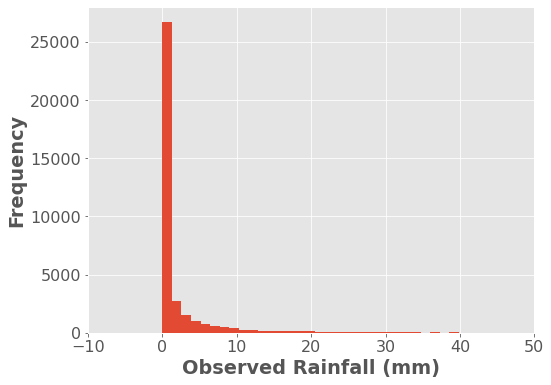

In [9]:
df_train["Observed"].plot(kind="hist",
                        bins=150);
plt.xlabel("Observed Rainfall (mm)");
plt.xlim(-10,50)


### Step 5: Train ensemble machine learning model using RandomForestRegressor and evaluate with metric of your choice (e.g., RMSE) by considering Observed as the target column.

In [10]:
X_train, y_train = df_train.drop(columns=["Observed"]), df_train["Observed"]
X_test, y_test = df_test.drop(columns=["Observed"]), df_test["Observed"]
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

### 6. Discuss your results. Are you getting better results with ensemble models compared to the individual climate models?

In [11]:
rmse_dict = {}
y_predict = model.predict(X_train)
rmse_dict["ensemble model"] = mean_squared_error(y_train, y_predict, squared=False)

for model_pred in X_train.columns:
    rmse_dict[model_pred] = mean_squared_error(y_train, X_train[model_pred], squared=False)
df_rmse = pd.DataFrame(rmse_dict, index=["RMSE"]).transpose().sort_values(by=["RMSE"])
df_rmse

,RMSE
ensemble model,3.095956
KIOST-ESM,9.196532
FGOALS-g3,9.284867
NESM3,9.371897
MPI-ESM1-2-HR,9.489925
MRI-ESM2-0,9.609047
MPI-ESM1-2-LR,9.681899
GFDL-CM4,9.889638
EC-Earth3-Veg-LR,9.902149
NorESM2-LM,9.918216


> **Ensemble model using RandomForestRegressor with default parameter performs better with lowest RMSE as compared to other models**

## Part 2:

### Preparation for deploying model next week

#### Complete task 4 from the milestone3 before coming here

We’ve found ```n_estimators=100, max_depth=5``` to be the best hyperparameter settings with MLlib (from the task 4 from milestone3), here we then use the same hyperparameters to train a scikit-learn model. 

In [12]:
model = RandomForestRegressor(n_estimators=100, max_depth=5, bootstrap=False)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=False, max_depth=5)

In [13]:
print(f"Train RMSE: {mean_squared_error(y_train, model.predict(X_train), squared=False):.2f}")
print(f" Test RMSE: {mean_squared_error(y_test, model.predict(X_test), squared=False):.2f}")

Train RMSE: 7.91
 Test RMSE: 8.72


In [14]:
# ready to deploy
dump(model, "model.joblib")

['model.joblib']

***Upload model.joblib to s3. You choose how you want to upload it.***

In [15]:
import boto3

In [16]:
s3 = boto3.resource('s3', aws_access_key_id=aws_credentials["key"], aws_secret_access_key=aws_credentials["secret"])

In [17]:

s3.meta.client.upload_file('model.joblib', 'mds-s3-student55', 'output/model.joblib')

![](img/task3_p2.png)